# Guía de Pandas

## Introducción y Contexto

**Pandas es una biblioteca** de Python que proporciona **estructuras de datos y herramientas de análisis de datos** flexibles y eficientes. Es una de las herramientas más utilizadas en la ciencia de datos y el análisis de datos. Si ya estás familiarizado con NumPy, te resultará fácil aprender Pandas, ya que se basa en NumPy.

Pandas introduce dos nuevas estructuras de datos a Python - **Series** y **DataFrame**, ambas construidas sobre NumPy. Una **Serie es una matriz unidimensional** que puede contener cualquier tipo de datos, mientras que un **DataFrame es una estructura de datos bidimensional**, similar a una tabla de base de datos o una hoja de cálculo de Excel.

## Preparación de Datos para trabajar

### Instalación y preparación de herramientas

Para instalar Pandas, puedes usar pip, que es el instalador de paquetes de Python. En tu terminal, simplemente ejecuta:

```bash
pip install pandas
```

Para usar Pandas en tu script de Python, debes importarlo. La convención común es importarlo bajo el alias `pd`:

In [1]:
import numpy as np
import pandas as pd


### Creación/obtención de datos para la guía

Vamos a crear algunas Series y DataFrames de Pandas para usar en nuestros ejemplos. En Pandas, puedes crear una Serie utilizando la función `pd.Series()`, pasando una lista como argumento:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


También puedes crear un DataFrame pasando un diccionario de objetos que pueden ser convertidos en series-like:

In [3]:
df = pd.DataFrame({
    'A': pd.Timestamp('20230506'),
    'B': pd.Series(1, index=list(range(4)), dtype='float32'),
    'C': np.array([3] * 4, dtype='int32'),
    'D': pd.Categorical(["test", "train", "test", "train"]),
    'E': 'foo'
})
print(df)

           A    B  C      D    E
0 2023-05-06  1.0  3   test  foo
1 2023-05-06  1.0  3  train  foo
2 2023-05-06  1.0  3   test  foo
3 2023-05-06  1.0  3  train  foo


#### E/S con Pandas

Pandas proporciona funciones para leer y escribir DataFrames de/a varios formatos de archivos, incluyendo CSV, Excel, SQL, etc.

Aquí hay un ejemplo de cómo puedes **leer un DataFrame de un [archivo CSV](https://github.com/estebanmatias92/curso-python-avanzado-plan-de-estudio-CFL415/blob/main/modulo-3/demo/data/avocado.csv) y luego escribirlo en un nuevo archivo CSV**:

In [4]:
# Leer de un archivo CSV
df = pd.read_csv('data/avocado.csv')

# Realizar algunas operaciones...
df['TotalPrice'] = df['AveragePrice'] * df['Total Volume']

# Escribir en un nuevo archivo CSV
df.to_csv('data/avocado_total_prices.csv', index=False)

## Pandas - Operaciones/Metodos/Conceptos

### Creación de Series y DataFrames

Ya hemos visto cómo crear Series y DataFrames en la sección anterior. Recuerda que una Serie es una matriz unidimensional que puede contener cualquier tipo de datos, mientras que un DataFrame es una estructura de datos bidimensional, similar a una tabla de base de datos o una hoja de cálculo de Excel.

### Visualización de datos

Pandas se integra bien con Matplotlib para crear gráficos a partir de DataFrames y Series.

Aquí hay un ejemplo de cómo puedes visualizar los datos de un DataFrame:

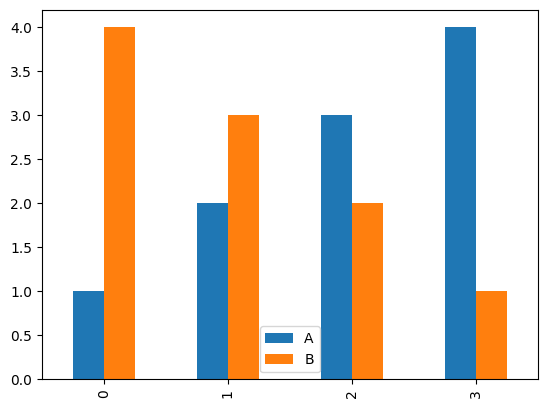

In [5]:
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [4, 3, 2, 1]
})

df.plot(kind='bar')
plt.show()

Resultado: Se mostrará un gráfico de barras con los datos del DataFrame.

### Operaciones básicas

Las operaciones básicas en Pandas son **similares a las de NumPy**, pero están diseñadas para trabajar con DataFrames y Series.

Aquí hay un ejemplo de cómo sumar dos Series:

In [6]:
a = pd.Series([1, 2, 3])
b = pd.Series([4, 5, 6])
c = a + b
print(c)

0    5
1    7
2    9
dtype: int64


### Indexación y slicing

La **indexación y el slicing en Pandas funcionan de manera similar a como lo hacen en las listas de Python**, pero también puedes indexar por etiqueta utilizando el índice del DataFrame.

Aquí hay un ejemplo de cómo acceder a una columna de un DataFrame:

In [7]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data)
apples = purchases['apples']
print(apples)

0    3
1    2
2    0
3    1
Name: apples, dtype: int64


### Funciones de agregación

Pandas proporciona una serie de funciones de agregación, como `mean`, `sum`, `min`, `max`, y muchas más.

Aquí hay un ejemplo de cómo calcular la suma de una columna de un DataFrame:

In [8]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data)
sum_of_apples = purchases['apples'].sum()
print(sum_of_apples)

6


### Manipulación de formas

Puedes **cambiar la forma de un DataFrame** en Pandas utilizando funciones como `pivot`.

Aquí hay un ejemplo de cómo pivotar un DataFrame:

In [9]:
data = {
    'fruit': ['apples', 'apples', 'oranges', 'oranges'],
    'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
    'sales': [100, 80, 150, 200]
}
df = pd.DataFrame(data)
pivot_df = df.pivot(index='city', columns='fruit', values='sales')
print(pivot_df)

fruit   apples  oranges
city                   
Austin     100      150
Dallas      80      200


### Más allá de lo básico

#### Manejo de datos faltantes

En la vida real, los datos a menudo tienen valores faltantes. Pandas proporciona métodos para manejar los datos faltantes de manera eficiente.

Aquí hay un ejemplo de cómo puedes rellenar los valores faltantes con un valor específico:

In [10]:
df = pd.DataFrame({
    'A': [1, 2, np.nan],
    'B': [5, np.nan, np.nan],
    'C': [1, 2, 3]
})
df_filled = df.fillna(value=0)
print(df_filled)

     A    B  C
0  1.0  5.0  1
1  2.0  0.0  2
2  0.0  0.0  3


#### Combinación de DataFrames

Pandas proporciona varias formas de combinar DataFrames, incluyendo `merge`, `join`, y `concat`.

Aquí hay un ejemplo de cómo puedes unir dos DataFrames en base a una columna común:

In [11]:
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2'],
    'key': ['K0', 'K1', 'K2']
})

df2 = pd.DataFrame({
    'C': ['C0', 'C1', 'C2'],
    'D': ['D0', 'D1', 'D2'],
    'key': ['K0', 'K1', 'K2']
})

merged = pd.merge(df1, df2, on='key')
print(merged)

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2


#### Agrupamiento y agregación de datos

El agrupamiento y la agregación de datos son técnicas poderosas que te permiten realizar análisis de datos más complejos.

Aquí hay un ejemplo de cómo puedes agrupar un DataFrame por una columna y calcular la suma de las otras columnas para cada grupo:

In [12]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})

grouped = df.groupby('A').sum()
print(grouped)

                     B         C         D
A                                         
bar        onethreetwo  1.190518 -0.249542
foo  onetwotwoonethree  0.581825  2.574752


(los números variarán debido a la generación aleatoria)